# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 643


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = 'https://api.openweathermap.org/data/2.5' +'?city=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get('https://api.openweathermap.org/data/2.5')

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaini
City not found. Skipping...
Processing Record 2 of Set 1 | broken hill
City not found. Skipping...
Processing Record 3 of Set 1 | east london
City not found. Skipping...
Processing Record 4 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 5 of Set 1 | carnarvon
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
City not found. Skipping...
Processing Record 7 of Set 1 | ancud
City not found. Skipping...
Processing Record 8 of Set 1 | erdaojiang
City not found. Skipping...
Processing Record 9 of Set 1 | riyadh
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 11 of Set 1 | denpasar
City not found. Skipping...
Processing Record 12 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 13 of Set 1 | bethel
City not found. Skipping...
Processing Record 14 of Set 1 | beian
City not foun

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.read_csv(r"C:\Users\Rosa\Desktop\MOD 6 Python API Challenge\Starter_Code\output_data\cities.csv")

# Show Record Count
city_data_df.count()

City_ID       577
City_ID.1     577
City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City_ID,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv(r"C:\Users\Rosa\Desktop\MOD 6 Python API Challenge\Starter_Code\output_data\cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\Rosa\Desktop\MOD 6 Python API Challenge\Starter_Code\output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,
0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

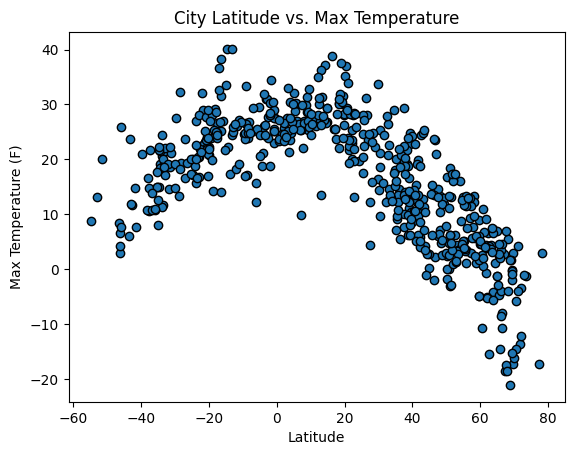

In [16]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


# Save the figure
plt.savefig(r"C:\Users\Rosa\Desktop\MOD 6 Python API Challenge\Starter_Code\output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

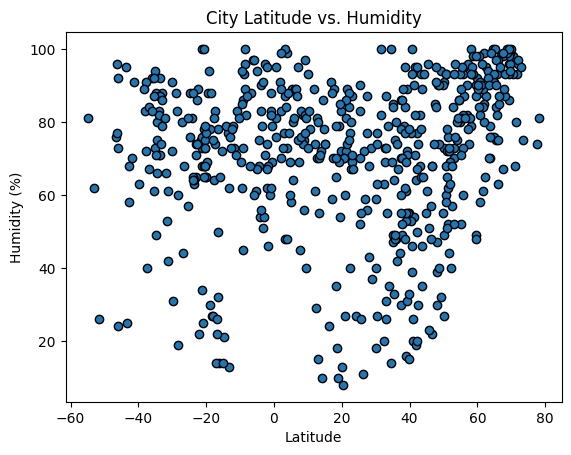

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(r"C:\Users\Rosa\Desktop\MOD 6 Python API Challenge\Starter_Code\output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

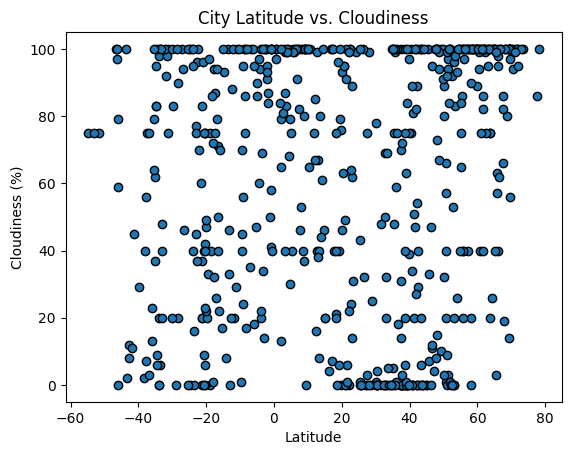

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(r"C:\Users\Rosa\Desktop\MOD 6 Python API Challenge\Starter_Code\output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

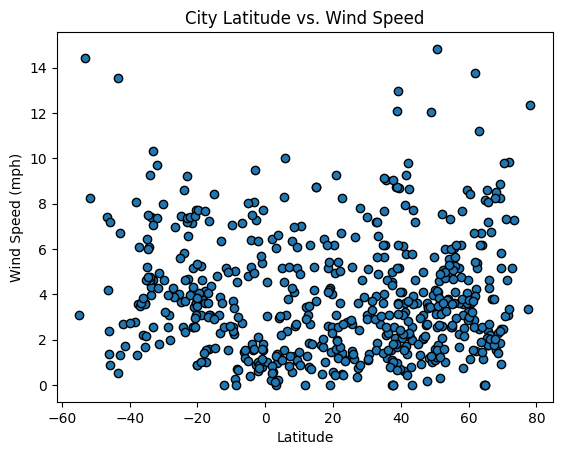

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig(r"C:\Users\Rosa\Desktop\MOD 6 Python API Challenge\Starter_Code\output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates): 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# now we have to get the regression values
    regress_values = x_values * slope + intercept

# next step, is to create line equation string
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"


# Create the scatter plot and linear regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

# we need to label and annotate the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")

# Set the title, x-label, and y-label
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

# Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,
0,0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]


# Display sample data
southern_hemi_df.head()

,City_ID.2,City_ID.1,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,,,
2,2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7161472181434118


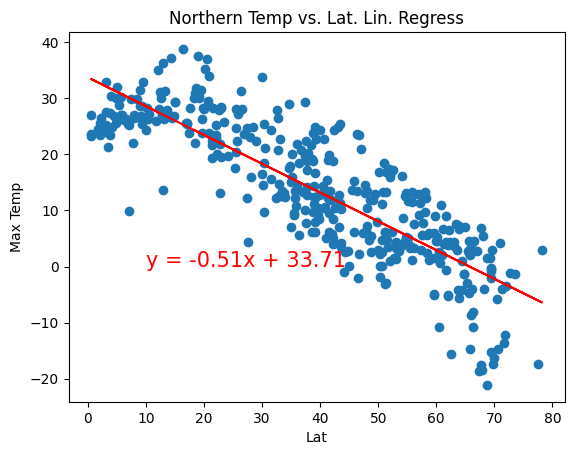

In [23]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# title= "Temp vs. Lat. Lin. Regress"
# xlabel= "latitude"
# ylabel= "Temp"
# text_coordinates= (10,0)

# def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, text_coordinates):
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# plt.title("Linear Regression on Northern Hemi for Max Temp")
# plt.xlabel("Latitude")
# plt.ylabel("Max Temp (F)")

# # now we have to get the regression values
# regress_values = x_values * slope + intercept

# # next step, is to create line equation string
# line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# # Create scatter plot and linear regression line
# plt.scatter(x_values, y_values)
# plt.plot(x_values, regress_values, "r-")

# # we need to label and annotate the line equation
# plt.annotate(line_eq,(10,0),fontsize=15, color="red")


# plot_linear_regression(x_values, y_values, "Linear Regression on Northern Hemisphere for Maximum Temperature", "Latitude", "Max Temp (F)", (0, -20))

# # Print r-squared value
# print(f"The r-squared is: {rvalue**2}")


plot_linear_regression(x_values, y_values, "Northern Temp vs. Lat. Lin. Regress", "Lat", "Max Temp", (10,0))

The r-squared is: 0.41210571686072434


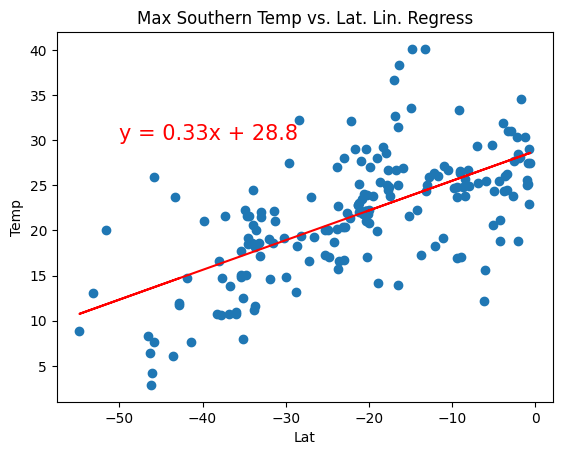

In [24]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


plot_linear_regression(x_values, y_values, "Max Southern Temp vs. Lat. Lin. Regress", "Lat", "Temp", (-50,30))


**Discussion about the linear relationship:** the data shows a strong correlation between the more south you and the higher the temperature gets.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05689741545789602


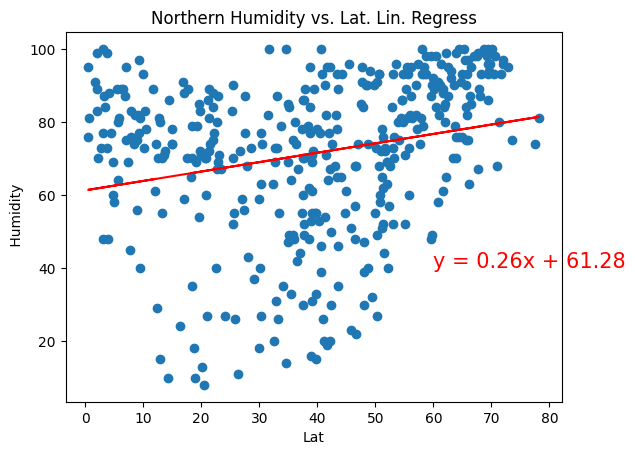

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']




plot_linear_regression(x_values, y_values, "Northern Humidity vs. Lat. Lin. Regress", "Lat", " Humidity", (60,40))




The r-squared is: 0.0002808747046324612


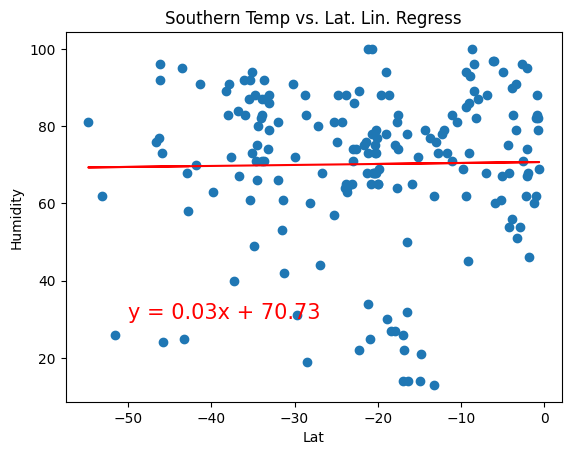

In [45]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']



plot_linear_regression(x_values, y_values, "Southern Temp vs. Lat. Lin. Regress", "Lat", "Humidity", (-50,30))



**Discussion about the linear relationship:** There is a decent coorelation between humidity and southern temperatures. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.024026517125811025


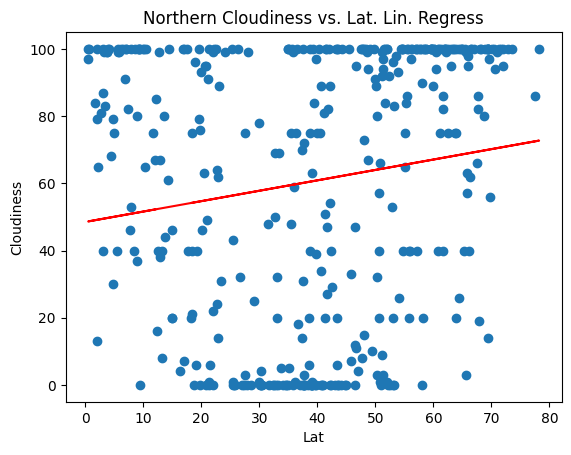

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

plot_linear_regression(x_values, y_values, "Northern Cloudiness vs. Lat. Lin. Regress", "Lat", "Cloudiness", (-50,30))



The r-squared is: 0.020567354299943663


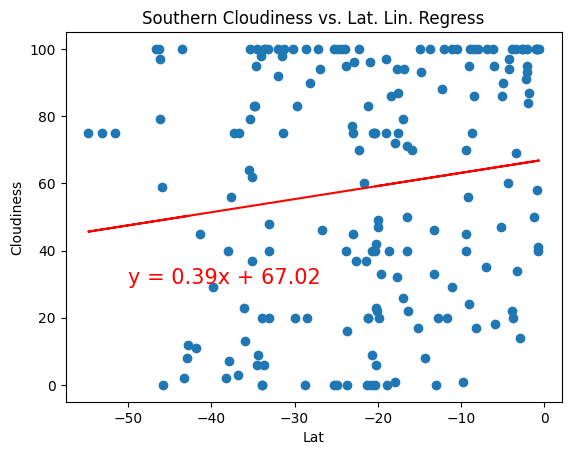

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']


plot_linear_regression(x_values, y_values, "Southern Cloudiness vs. Lat. Lin. Regress", "Lat", "Cloudiness", (-50,30))

**Discussion about the linear relationship:** based on the scatter plot results there doesnt see mto be a string coorelation between cloudiness and latitude geo location.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.030396762354449457


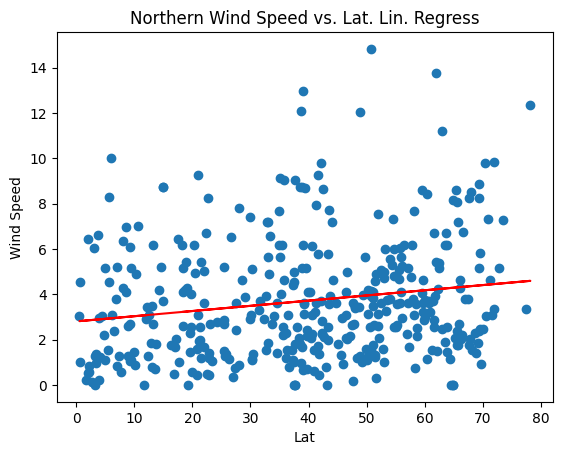

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']



plot_linear_regression(x_values, y_values, "Northern Wind Speed vs. Lat. Lin. Regress", "Lat", "Wind Speed", (-50,30))

The r-squared is: 0.062239040700515724


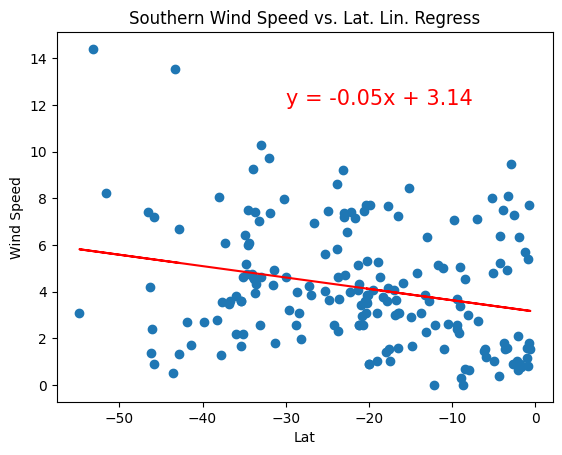

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']



plot_linear_regression(x_values, y_values, "Southern Wind Speed vs. Lat. Lin. Regress", "Lat", "Wind Speed", (-30,12))

**Discussion about the linear relationship:** after running the data, there is a correlation between wind speed and the more south you go.